# Setup an


In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix
)

# 1. Load Dataset
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/compas-scores-two-years.csv"
df = pd.read_csv(url)

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/compas-scores-two-years.csv"
df = pd.read_csv(url)

# Menampilkan informasi dasar
print(f"Shape: {df.shape}")
print("\nColumns:", df.columns.tolist())
print("\nData types:\n", df.dtypes.value_counts())
print("\nMissing values:\n", df.isnull().sum().sort_values(ascending=False).head(10))

Shape: (7214, 53)

Columns: ['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob', 'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count', 'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_days_from_compas', 'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number', 'r_charge_degree', 'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid', 'is_violent_recid', 'vr_case_number', 'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc', 'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date', 'v_type_of_assessment', 'v_decile_score', 'v_score_text', 'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1', 'start', 'end', 'event', 'two_year_recid']

Data types:
 object     33
int64      16
float64     4
Name: count, dtype: int64

Missing values:
 violent_recid         7214
vr_charge_degr

# visualisasi fitur yang ada

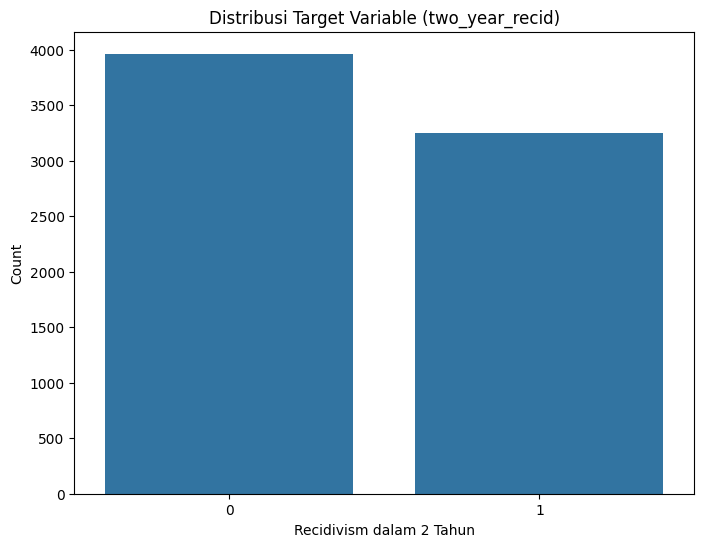

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(x='two_year_recid', data=df)
plt.title('Distribusi Target Variable (two_year_recid)')
plt.xlabel('Recidivism dalam 2 Tahun')
plt.ylabel('Count')
plt.show()

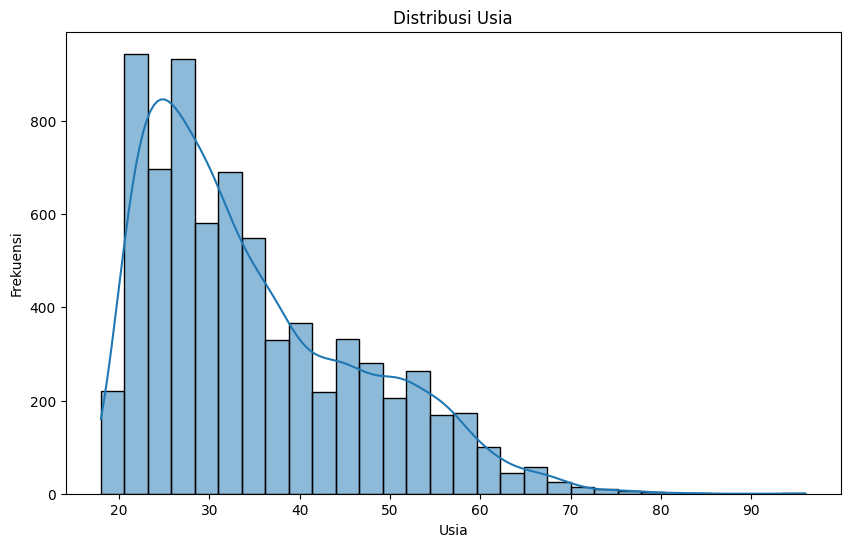

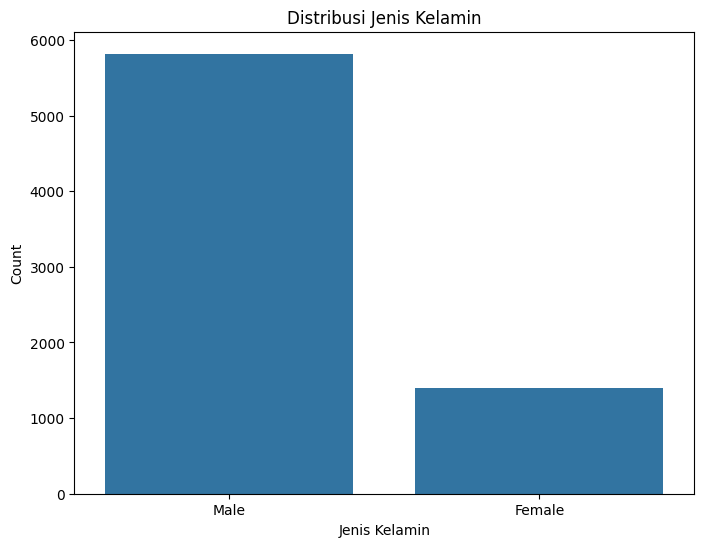

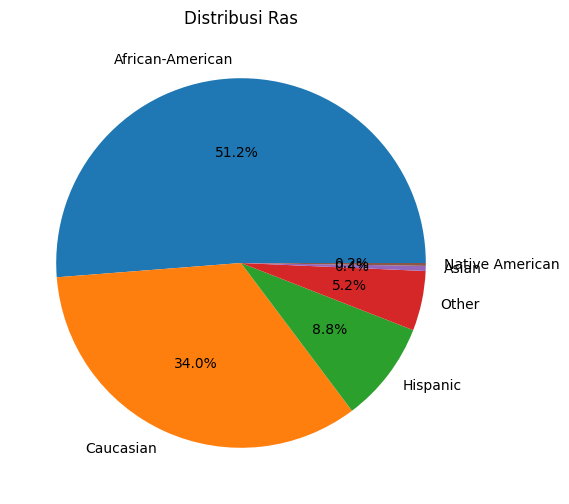

In [4]:
# Age
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

# Gender
plt.figure(figsize=(8,6))
sns.countplot(x='sex', data=df)
plt.title('Distribusi Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Count')
plt.show()

# Race
plt.figure(figsize=(10,6))
race_counts = df['race'].value_counts()
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%')
plt.title('Distribusi Ras')
plt.show()

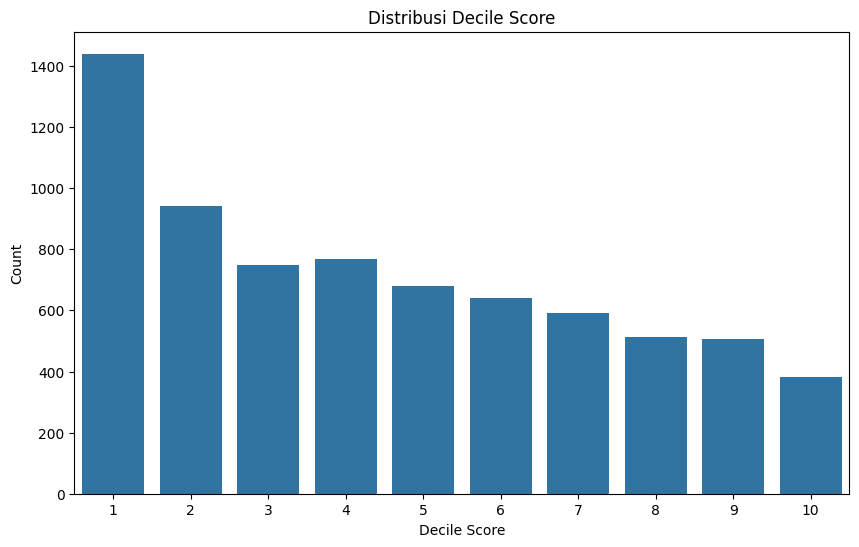

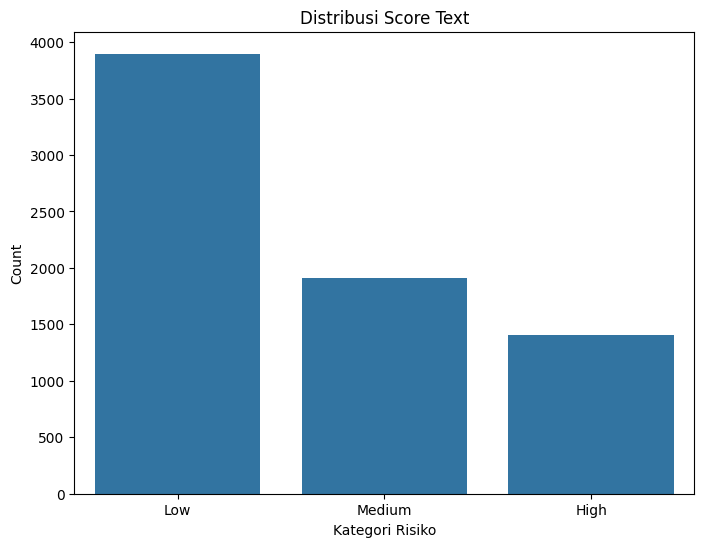

In [5]:
# Decile score
plt.figure(figsize=(10,6))
sns.countplot(x='decile_score', data=df)
plt.title('Distribusi Decile Score')
plt.xlabel('Decile Score')
plt.ylabel('Count')
plt.show()

# Score text
plt.figure(figsize=(8,6))
sns.countplot(x='score_text', data=df, order=['Low', 'Medium', 'High'])
plt.title('Distribusi Score Text')
plt.xlabel('Kategori Risiko')
plt.ylabel('Count')
plt.show()

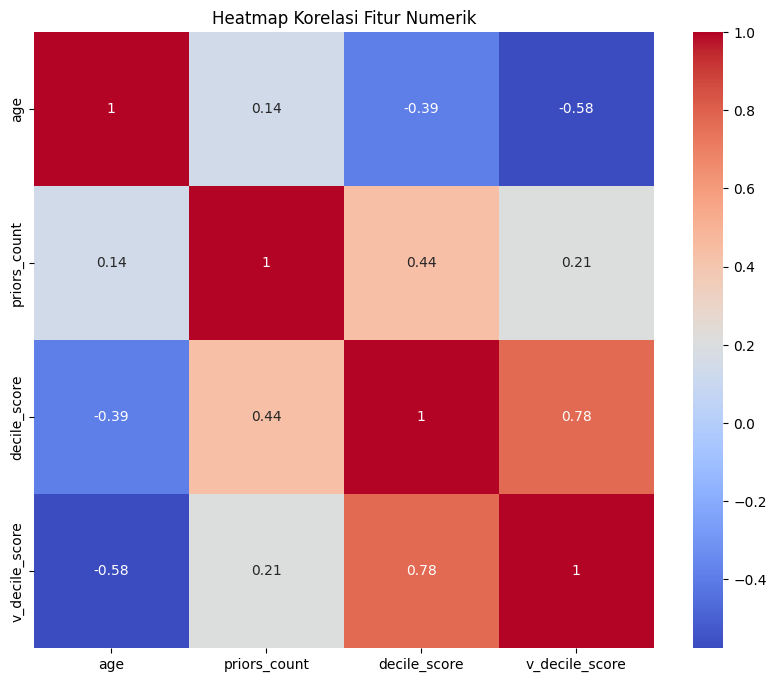

In [6]:
# Pilih fitur numerik untuk heatmap korelasi
numerical_features = ['age', 'priors_count', 'decile_score', 'v_decile_score']
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

# Feature Engineering

In [11]:
# Memilih fitur yang relevan
features = ['age', 'sex', 'race', 'priors_count', 'c_charge_degree', 'decile_score']
target = 'two_year_recid'

# Membuat dataframe baru dengan fitur yang dipilih
df_clean = df[features + [target]].copy()

# Menangani missing values
df_clean = df_clean.dropna()

# Konversi target ke integer
df_clean[target] = df_clean[target].astype(int)
# Split data
X = df_clean[features]
y = df_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing pipeline
numeric_features = ['age', 'priors_count', 'decile_score']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['sex', 'race', 'c_charge_degree']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# evaluasi model

Akurasi: 0.6915
Presisi: 0.6739
Recall: 0.5866
F1 Score: 0.6272
AUC-ROC: 0.7428


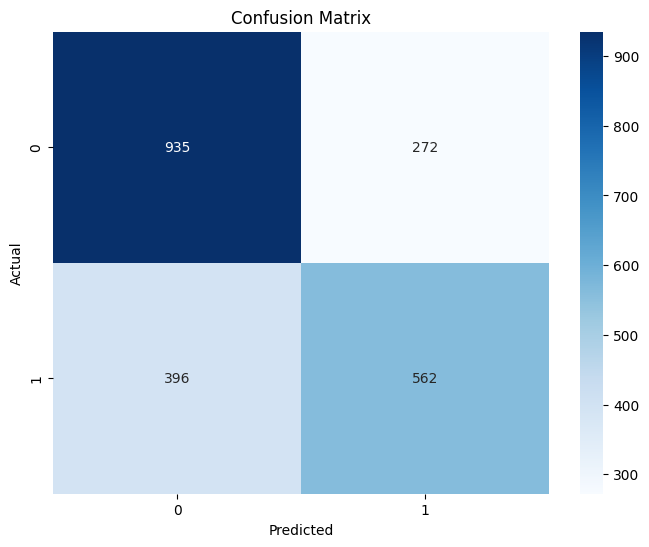

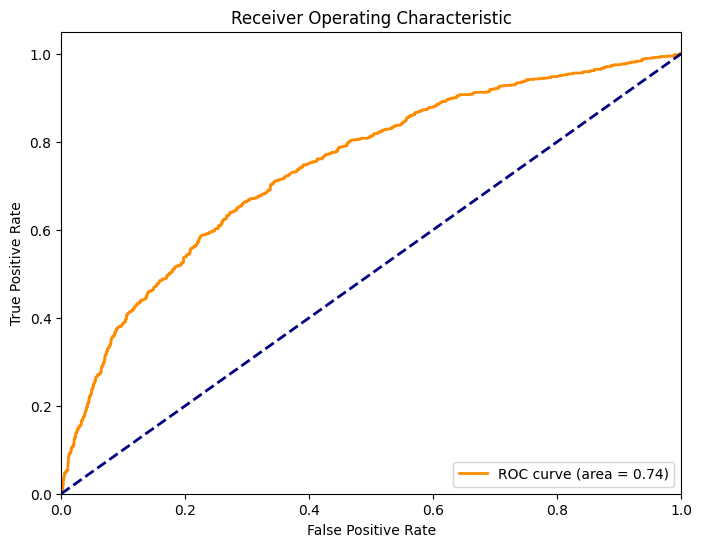

In [12]:
# Menghitung berbagai metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Penjelasan Persamaan Matematika untuk Setiap Metrik Evaluasi
1. Akurasi (Accuracy)
Akurasi mengukur proporsi prediksi yang benar (baik positif maupun negatif) dari seluruh prediksi.
Dimana:
TP = True Positives

TN = True Negatives

FP = False Positives

FN = False Negatives

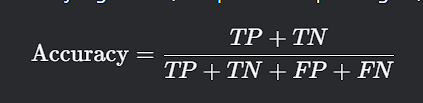

2. Presisi (Precision)
Presisi mengukur proporsi prediksi positif yang benar dari seluruh prediksi positif.

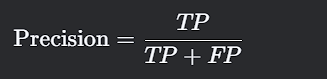

3. Recall (Sensitivity/True Positive Rate)
Recall mengukur proporsi kasus positif yang berhasil diidentifikasi dengan benar.

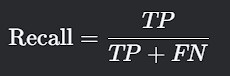

4. F1 Score
F1 Score adalah rata-rata harmonik dari presisi dan recall, berguna ketika kita ingin menyeimbangkan keduanya.

F1 Score
=
2
×
Precision
×
Recall
Precision
+
Recall
F1 Score=2×
Precision+Recall
Precision×Recall
​

5. AUC-ROC (Area Under the Receiver Operating Characteristic Curve